# Distribution of Compustat observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

------

## Load data

In [2]:
df= pd.read_csv("compustat_from_1990.csv")[['gvkey', 'fyear', 'at', 'sale', 'ni']]
print(df.shape)
df.head()

(211966, 5)


,gvkey,fyear,at,sale,ni
0,1004,1990,379.958,466.542,14.801
1,1004,1991,395.351,422.657,10.020
2,1004,1992,365.151,382.780,0.283
3,1004,1993,417.626,407.754,9.494
4,1004,1994,425.814,451.395,10.463


In [3]:
df['neg_ni']= (df.ni <= 0).astype(int)
df.head()

,gvkey,fyear,at,sale,ni,neg_ni
0,1004,1990,379.958,466.542,14.801,0
1,1004,1991,395.351,422.657,10.020,0
2,1004,1992,365.151,382.780,0.283,0
3,1004,1993,417.626,407.754,9.494,0
4,1004,1994,425.814,451.395,10.463,0


### Aggregate data to year-level

In [4]:
yearly_loss= df.groupby('fyear').agg({
                            'gvkey':'count',
                            'neg_ni':('mean')
                            }).reset_index()
yearly_loss.rename(columns={'gvkey':'count'}, inplace= True)
yearly_loss= yearly_loss[yearly_loss.fyear>= 1990]
yearly_loss.head()

,fyear,count,neg_ni
0,1990,6674,0.385975
1,1991,6783,0.401003
2,1992,7133,0.382308
3,1993,7596,0.367825
4,1994,8061,0.335690


--------------------------------------
## Visualization after aggregation

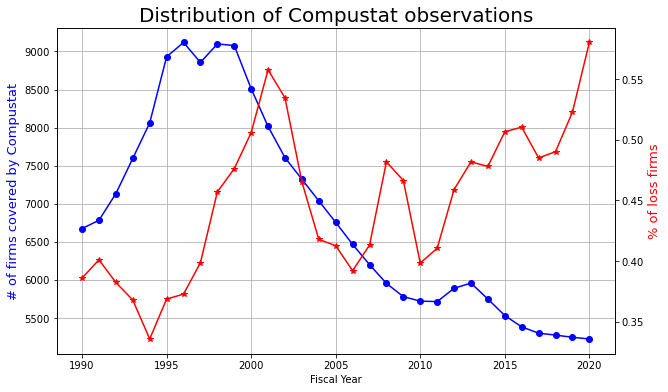

In [5]:
fig, ax1 = plt.subplots(figsize= (10,6))
ax2 = ax1.twinx()
ax1.plot(yearly_loss['fyear'], yearly_loss['count'], marker= 'o', color='b', label= 'Compustat obs #')
ax2.plot(yearly_loss['fyear'], yearly_loss['neg_ni'], marker= '*', color='r', label= 'loss firm %')
ax1.set_title('Distribution of Compustat observations', fontsize= 20)
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('# of firms covered by Compustat', color='b', fontsize= 13)
ax2.set_ylabel('% of loss firms', color='r', fontsize= 13)
ax1.grid()
plt.show()

--------------